In [1]:
import pandas as pd
from io import StringIO
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split , cross_val_score
import joblib

In [2]:
with open('D:\DS\crwa\Data-Science-project\preprocess_data.json', 'r') as file:
    json_data = file.read()

df = pd.read_json(StringIO(json_data))

In [3]:
df

,name,asin,brand,color,size,price,department,origin,rating,star,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3G46LT,295,5,0,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
1,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CYGX1VRB,295,0,2,45.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
2,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CWLJN23H,295,0,3,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
3,3 Pack Mens Athletic Sweatpants with Zipper Po...,B0CT3JXKKT,295,1,1,44.99,2,0,909,4.5,...,0,0,0,0,1,0,0,0,0,0
4,2Pack Men's Rash Guard UPF 50+ Sun Protection ...,B0CQC72M2D,198,0,4,16.99,2,0,35,4.1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,Women's Full Slips Adjustable Spaghetti Strap ...,B0D1TH4KMX,158,10,3,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19764,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SXP3WB,158,7,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19765,Women's Full Slips Adjustable Spaghetti Strap ...,B0D8SYVMC4,158,1,1,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0
19766,Women's Full Slips Adjustable Spaghetti Strap ...,B0CTYL3FB9,158,5,2,27.99,1,0,15,4.6,...,0,0,0,0,0,0,1,0,0,0


In [4]:
col = ['url','name','asin']
df.drop(columns=col, inplace=True)

In [10]:
df = df[df['department'] != 0]

In [11]:
df

,brand,color,size,price,department,origin,rating,star,Polyester,Spandex,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,295,5,0,44.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
1,295,0,2,45.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
2,295,0,3,44.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
3,295,1,1,44.99,2,0,909,4.5,0.87,0.13,...,0,0,0,0,1,0,0,0,0,0
4,198,0,4,16.99,2,0,35,4.1,0.95,0.05,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19763,158,10,3,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0
19764,158,7,2,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0
19765,158,1,1,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0
19766,158,5,2,27.99,1,0,15,4.6,0.00,0.22,...,0,0,0,0,0,0,1,0,0,0


In [12]:
def balance_categorical_data(X, category_columns):
    """
    Balances the dataset by duplicating rows from under-represented categories in a specified categorical column.
    
    Parameters:
    X (pd.DataFrame): The feature data with categorical features.
    category_column (str): The column name containing the categorical feature to balance.
    
    Returns:
    X_resampled (pd.DataFrame): The resampled feature data.
    """
    for category_column in category_columns:
        # Count the occurrences of each category in the specified column
        category_counts = X[category_column].value_counts()
        
        # Identify the category with the most and least occurrences
        majority_category = category_counts.idxmax()
        minority_category = category_counts.idxmin()
        
        # Get the number of occurrences of the majority and minority categories
        majority_count = category_counts[majority_category]
        minority_count = category_counts[minority_category]
        
        # Find how many rows need to be added for each minority category
        duplication_factor = majority_count // (minority_count*3)
        
        # Separate rows belonging to the minority category
        minority_data = X[X[category_column] == minority_category]
        
        # Duplicate the rows for the minority category
        X = pd.concat([X] + [minority_data] * duplication_factor, axis=0)
        
        # Shuffle the dataset to ensure randomness after duplication
        X = X.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return X

In [20]:
imbalance_col = ['department', 'origin', 'Not Bleach', 'Tumble Dry', 'Tie', 'No closure', 'Elastic', 'Lace Up', 'Drawstring']
df = balance_categorical_data(df,imbalance_col)

In [21]:
df

,brand,color,size,price,department,origin,rating,star,Polyester,Spandex,...,Not Bleach,Tumble Dry,Pull on,Tie,Zipper,Button,No closure,Elastic,Lace Up,Drawstring
0,450,1,0,22.99,1,0,295,3.6,0.85,0.15,...,0,0,0,0,0,0,0,0,0,1
1,111,9,3,45.99,1,0,761,4.2,1.00,0.00,...,1,0,0,1,0,0,0,0,0,0
2,187,7,1,54.95,2,1,118,4.7,0.38,0.05,...,0,0,0,0,0,0,0,0,1,0
3,32,1,3,59.62,1,1,904,4.6,0.40,0.00,...,0,0,0,0,0,0,0,0,1,0
4,149,11,2,25.99,1,0,318,4.3,0.00,0.18,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147636,23,3,3,31.59,1,0,3533,4.4,0.00,0.00,...,0,1,0,0,0,0,0,0,0,1
147637,23,2,0,11.80,1,0,65853,4.6,0.00,0.03,...,0,1,0,0,0,0,1,0,0,0
147638,411,0,0,19.99,1,0,5783,4.4,0.00,0.18,...,1,1,0,0,0,0,0,0,0,1
147639,100,7,3,24.99,1,0,4009,4.4,0.90,0.10,...,0,1,0,0,0,0,0,0,0,1


In [22]:
target = 'price'
features = [col for col in df.columns if col != target]
x = df[features]
y = df[target]

In [23]:
x_train, x_temp, y_train, y_temp = train_test_split(x,y, test_size=0.2, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

In [24]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [25]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV , KFold

param_grid = {
    'max_depth': [5, 10, 15, 20, 25,30],
    'min_samples_split': [2, 5, 10,15],
    'min_samples_leaf': [1, 2, 5],
}

cv = KFold(n_splits=5, shuffle=True, random_state=42)


dt_reg = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=cv, scoring=['r2','neg_mean_squared_error'], refit='neg_mean_squared_error', verbose=2)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=2; total time=   0.1s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=5; total time=   0.0s
[CV] END max_depth=5, min_samples_leaf=1, min_samples_split=10; total time=   0.0s
[CV] END max_depth=5, min_samples_l

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [5, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10, 15]},
             refit='neg_mean_squared_error',
             scoring=['r2', 'neg_mean_squared_error'], verbose=2)

In [ ]:
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
mae = median_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'MAE: {mae}')
print(f'RMSE: {rmse}')
print(f'R²: {r2}')

Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10}
RMAE: 9.237055564881302e-14
RMSE: 6.012126378338498
R²: 0.8077611447172782


In [27]:
joblib.dump(best_model, "decision_tree_price_prediction_model.pkl")

['decision_tree_price_prediction_model.pkl']

In [28]:
import numpy as np

results = grid_search.cv_results_

max_depths = [params['max_depth'] for params in results['params']]

mean_r2_scores = results['mean_test_r2']
mean_neg_mse_scores = results['mean_test_neg_mean_squared_error']

In [29]:
mean_mse_scores = -1 * np.array(mean_neg_mse_scores) 
mean_rmse_scores = np.sqrt(mean_mse_scores)

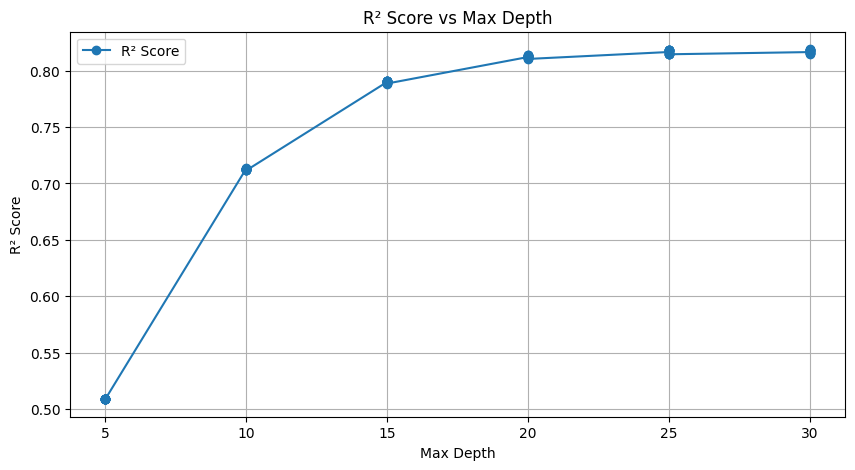

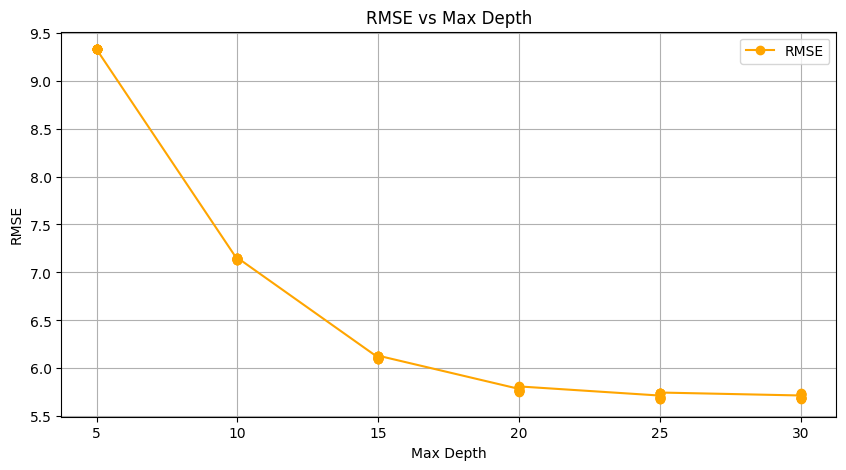

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(max_depths, mean_r2_scores, 'o-', label="R² Score")
plt.title('R² Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('R² Score')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(max_depths, mean_rmse_scores, 'o-', color='orange', label="RMSE")
plt.title('RMSE vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('RMSE')
plt.grid(True)
plt.legend()
plt.show()